In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#通過字典型資料創建資料框
t=np.arange(0,2,0.1)
x=np.sin(t)
y=np.cos(t)
mydict={'time':t, 'x':x, 'y': y}
mydict
mydf=pd.DataFrame(mydict)
mydf

,time,x,y
0,0.0,0.000000,1.000000
1,0.1,0.099833,0.995004
2,0.2,0.198669,0.980067
3,0.3,0.295520,0.955336
4,0.4,0.389418,0.921061
5,0.5,0.479426,0.877583
6,0.6,0.564642,0.825336
7,0.7,0.644218,0.764842
8,0.8,0.717356,0.696707
9,0.9,0.783327,0.621610


In [3]:
type(mydf)

pandas.core.frame.DataFrame

In [4]:
#通過讀入csv文件創建資料框
mydata=pd.read_csv('./应用回归分析数据/ex5-1.csv')
mydata

,number,x,y
0,1,294,30
1,2,247,32
2,3,267,37
3,4,358,44
4,5,423,47
5,6,311,49
6,7,450,56
7,8,534,62
8,9,438,68
9,10,697,78


In [5]:
#對pandas資料框的操作(1)
mydf.head()
mydf.tail()
mydf[3:6]
mydf['time']
mydf.time

0     0.0
1     0.1
2     0.2
3     0.3
4     0.4
5     0.5
6     0.6
7     0.7
8     0.8
9     0.9
10    1.0
11    1.1
12    1.2
13    1.3
14    1.4
15    1.5
16    1.6
17    1.7
18    1.8
19    1.9
Name: time, dtype: float64

In [6]:
mydf[['time','x']]
mydf.iloc[0:5,[0,2]]

,time,y
0,0.0,1.000000
1,0.1,0.995004
2,0.2,0.980067
3,0.3,0.955336
4,0.4,0.921061


In [7]:
#對pandas資料框的操作(2)
mydf['one']=np.ones(len(mydf))
mydf

,time,x,y,one
0,0.0,0.000000,1.000000,1.0
1,0.1,0.099833,0.995004,1.0
2,0.2,0.198669,0.980067,1.0
3,0.3,0.295520,0.955336,1.0
4,0.4,0.389418,0.921061,1.0
5,0.5,0.479426,0.877583,1.0
6,0.6,0.564642,0.825336,1.0
7,0.7,0.644218,0.764842,1.0
8,0.8,0.717356,0.696707,1.0
9,0.9,0.783327,0.621610,1.0


In [8]:
mydf2=mydf[['one','time','x','y']]
mydf2

,one,time,x,y
0,1.0,0.0,0.000000,1.000000
1,1.0,0.1,0.099833,0.995004
2,1.0,0.2,0.198669,0.980067
3,1.0,0.3,0.295520,0.955336
4,1.0,0.4,0.389418,0.921061
5,1.0,0.5,0.479426,0.877583
6,1.0,0.6,0.564642,0.825336
7,1.0,0.7,0.644218,0.764842
8,1.0,0.8,0.717356,0.696707
9,1.0,0.9,0.783327,0.621610


In [9]:
del mydf2['y']
mydf.drop(mydf.index[19])
new_row={'time':2.0, 'x':2.22, 'y':3.33, 'one':1.0}
mydf.append(new_row, ignore_index=True)

,time,x,y,one
0,0.0,0.000000,1.000000,1.0
1,0.1,0.099833,0.995004,1.0
2,0.2,0.198669,0.980067,1.0
3,0.3,0.295520,0.955336,1.0
4,0.4,0.389418,0.921061,1.0
5,0.5,0.479426,0.877583,1.0
6,0.6,0.564642,0.825336,1.0
7,0.7,0.644218,0.764842,1.0
8,0.8,0.717356,0.696707,1.0
9,0.9,0.783327,0.621610,1.0


# 視覺化

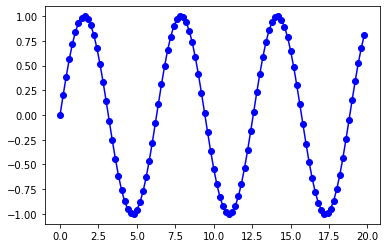

In [11]:
#畫出sin曲線
x=np.arange(0,20,0.2)
y=np.sin(x)
plt.plot(x,y,'bo-')

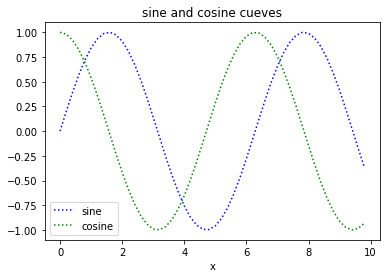

In [12]:
#合併sin, cos曲線
x=np.arange(0,10,0.2)
y=np.sin(x)
z=np.cos(x)
plt.plot(x,y,'b:',label='sine')
plt.plot(x,z,'g:',label='cosine')
plt.title('sine and cosine cueves')
plt.xlabel('x')
plt.legend()

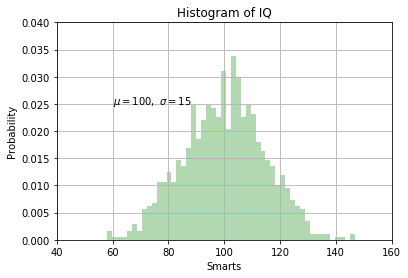

In [14]:
#畫出常態分布的直方图
mu,sigma=100,15
x=mu+sigma*np.random.randn(1000)
plt.hist(x,50,density=True,facecolor='g',alpha=0.3)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60,0.025,r'$\mu=100,\ \sigma=15$')
plt.xlim(40,160)
plt.ylim(0,0.04)
plt.grid(True)

In [16]:
#使用數列完成最小平方法簡單回歸
X=np.random.random((100,2))
X=sm.add_constant(X)
beta=[1,0.1,0.5]
e=np.random.random(100)
y=np.dot(X,beta)+0.1*e
results=sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1202.
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           3.55e-69
Time:                        16:53:25   Log-Likelihood:                 215.66
No. Observations:                 100   AIC:                            -425.3
Df Residuals:                      97   BIC:                            -417.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0456      0.007    140.928      0.0

In [17]:
#使用資料框和模型公式完成線性回歸
import statsmodels.formula.api as smf
x=np.random.random((100,3))
y=1+0.1*x[:,1]+0.5*x[:,2]+0.1*x[:,0]
mydict={'x1':x[:,1], 'x2':x[:,2], 'y':y}
mydata=pd.DataFrame(mydict)
results=smf.ols('y~x1+x2', data=mydata).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1132.
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           5.78e-68
Time:                        16:53:55   Log-Likelihood:                 213.80
No. Observations:                 100   AIC:                            -421.6
Df Residuals:                      97   BIC:                            -413.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0613      0.008    137.555      0.0